# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 49.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


## Import Statements

In [161]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter
from datetime import datetime, timedelta

## Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [8]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_hh_income.shape

(29322, 3)

In [ ]:
df_pct_poverty.shape

(29329, 3)

In [ ]:
df_pct_completed_hs.shape

(29329, 3)

In [ ]:
df_share_race_city.shape

(29268, 7)

In [ ]:
df_fatalities.shape

(2535, 14)

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
df_hh_income.dropna
df_hh_income.drop_duplicates

In [ ]:
df_pct_poverty.dropna
df_pct_poverty.drop_duplicates

In [ ]:
df_pct_completed_hs.dropna
df_pct_completed_hs.drop_duplicates

In [ ]:
df_share_race_city.dropna
df_share_race_city.drop_duplicates

In [ ]:
df_fatalities.dropna
df_fatalities.drop_duplicates

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [14]:
df_pct_poverty_2 = df_pct_poverty[['Geographic Area', 'poverty_rate']]

In [15]:
poverty = []
for n in df_pct_poverty_2['poverty_rate']:
  if n == '-':
    n = '0'
  poverty.append(float(n))

In [ ]:
df_pct_poverty_2 = df_pct_poverty_2.drop(columns=['poverty_rate'])
df_pct_poverty_2['poverty_rate'] = poverty
df_pct_poverty_2

In [17]:
a = df_pct_poverty_2.groupby(by='Geographic Area').sum().sort_index()

In [18]:
b = df_pct_poverty_2['Geographic Area'].value_counts().sort_index().to_frame()*100

In [19]:
pct_per_state = ((a['poverty_rate']/b['Geographic Area'])*100).to_frame()
pct_per_state = pct_per_state.rename(columns={0 : 'Poverty_pct_per_state'})

<Axes: title={'center': 'Poverty Rate Per State'}, xlabel='Geographic Area'>

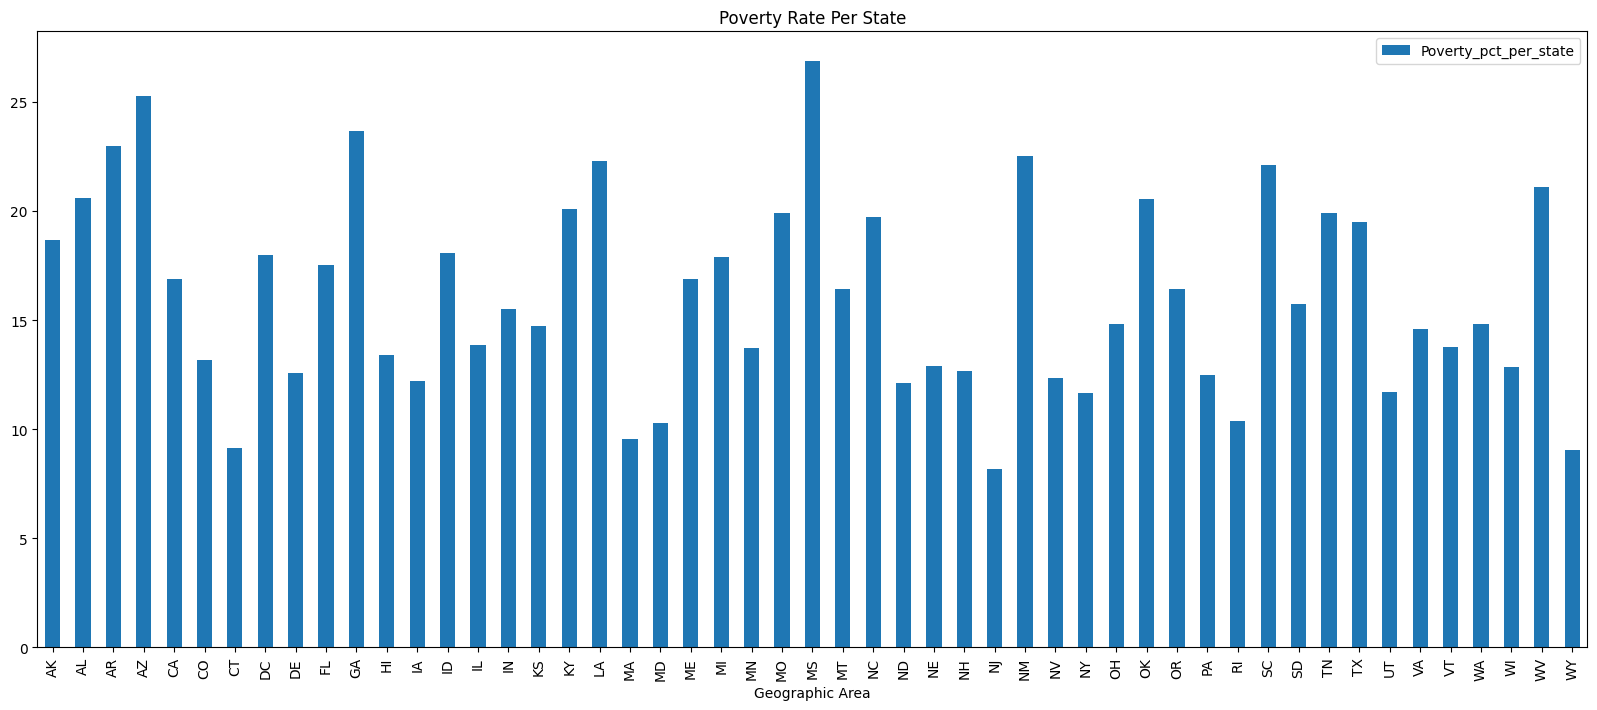

In [179]:
pct_per_state.plot.bar(figsize=(20, 8), title='Poverty Rate Per State')

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [21]:
df_pct_completed_hs_2 = df_pct_completed_hs[['Geographic Area', 'percent_completed_hs']]

In [ ]:

completed_hs = []
for n in df_pct_completed_hs_2['percent_completed_hs']:
  if n == '-':
    n = '0'
  completed_hs.append(float(n))

df_pct_completed_hs_2 = df_pct_completed_hs_2.drop(columns=['percent_completed_hs'])
df_pct_completed_hs_2['percent_completed_hs'] = completed_hs
df_pct_completed_hs_2

In [23]:
c = df_pct_completed_hs_2.groupby(by='Geographic Area').sum().sort_index()
d = df_pct_completed_hs_2['Geographic Area'].value_counts().sort_index().to_frame()*100

In [ ]:
pct_per_hs_state = ((c['percent_completed_hs']/d['Geographic Area'])*100).to_frame()
pct_per_hs_state[0] = 100 - pct_per_hs_state[0]
pct_per_hs_state = pct_per_hs_state.rename(columns={0 : 'percent_not_completed_hs_per_state'})
pct_per_hs_state.plot.bar(figsize=(20, 12))

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
pct_per_state.join(pct_per_hs_state, how='outer').plot.bar(figsize=(20, 12))

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:

combined_hs_state = pct_per_state.join(pct_per_hs_state, how='outer')
plt.figure(figsize=(20,10))
sns.scatterplot(data=combined_hs_state, x='percent_not_completed_hs_per_state', y='Poverty_pct_per_state')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

In [ ]:
plt.figure(figsize=(20,10))
sns.regplot(data=combined_hs_state, x='percent_not_completed_hs_per_state', y='Poverty_pct_per_state')


# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_share_race_city = df_share_race_city.drop(index=df_share_race_city[df_share_race_city['share_white']=='(X)'].index)
df_share_race_city

In [29]:
df_share_race_city['share_white'] = [float(i) for i in df_share_race_city['share_white']]
df_share_race_city['share_black'] = [float(i) for i in df_share_race_city['share_black']]
df_share_race_city['share_native_american'] = [float(i) for i in df_share_race_city['share_native_american']]
df_share_race_city['share_asian'] = [float(i) for i in df_share_race_city['share_asian']]
df_share_race_city['share_hispanic'] = [float(i) for i in df_share_race_city['share_hispanic']]

<ipython-input-188-31139607dd50>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: title={'center': 'Racial Make Up Per State'}, xlabel='Geographic area'>

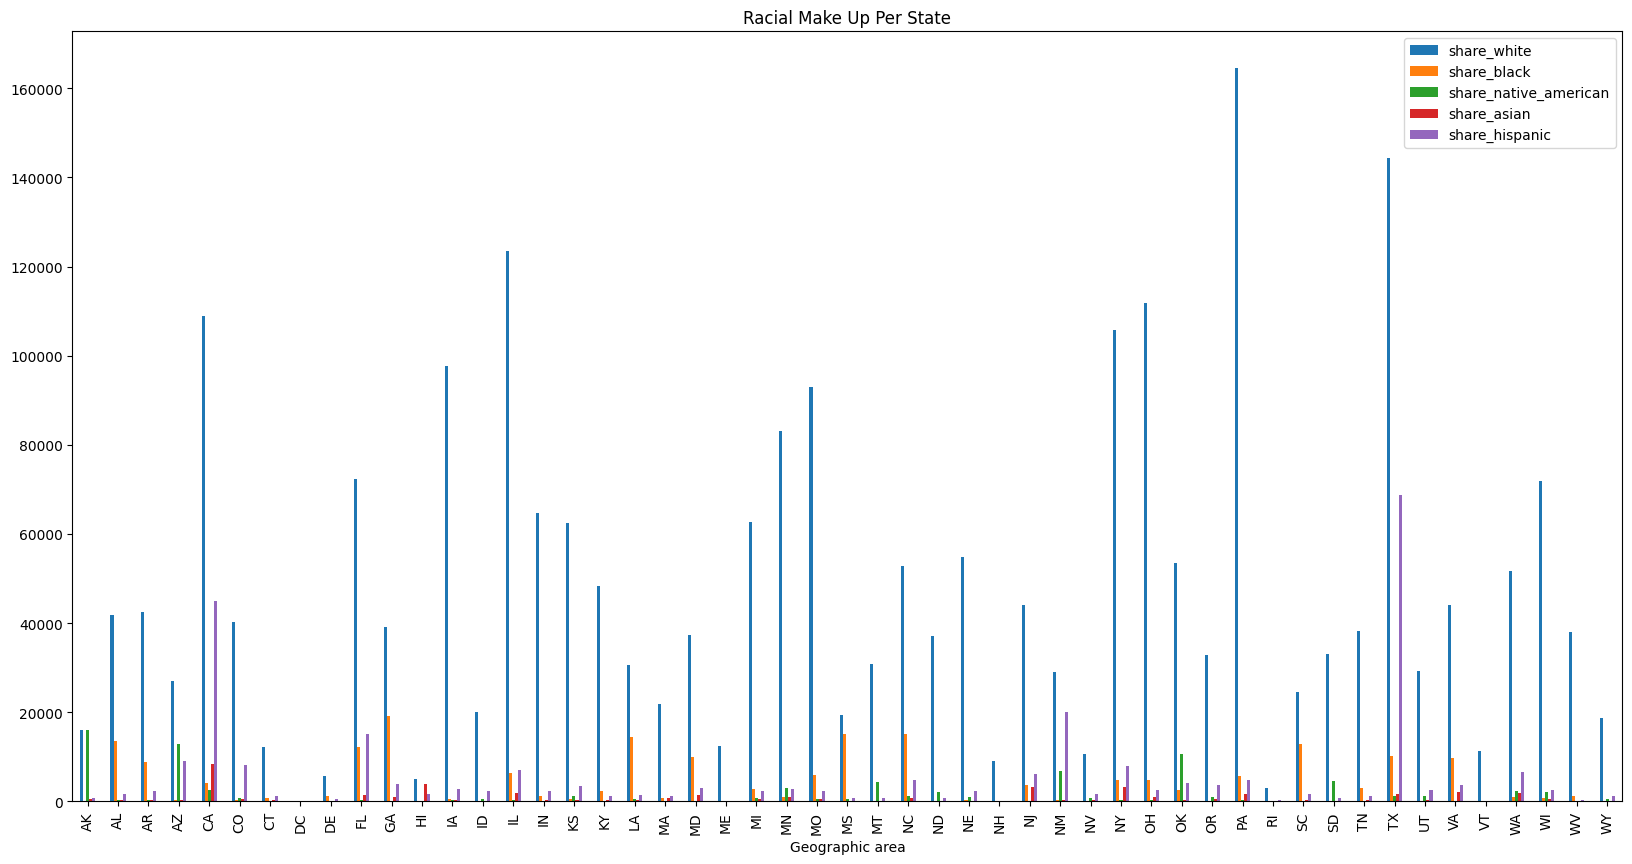

In [188]:
df_share_race_state = df_share_race_city.groupby(by='Geographic area').sum().sort_index()
df_share_race_state.plot.bar(figsize=(20,10), title = 'Racial Make Up Per State')

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
plt.pie(df_fatalities['race'].value_counts(), labels=df_fatalities['race'].value_counts().index)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
df_fatalities['gender'].value_counts().plot.bar()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
df_fatalities_3 = df_fatalities[['manner_of_death', 'age']].dropna()
df_fatalities_3.pivot(columns='manner_of_death', values='age').plot.box()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [34]:
people_armed_pct = 100 - (df_fatalities[df_fatalities['armed'] == 'unarmed']['armed'].value_counts()[0]/len(df_fatalities['armed'])) * 100
people_armed_pct

93.25443786982248

In [ ]:
df_fatalities[df_fatalities['armed'] != 'unarmed']['armed'].value_counts().plot.bar(figsize=(20, 12))

In [ ]:
df_fatalities['armed'].value_counts()['gun']

In [ ]:
df_fatalities['armed'].value_counts()['unarmed']

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
len(df_fatalities_3[df_fatalities_3['age']<25])*100/len(df_fatalities_3)

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

In [ ]:
df_fatalities_3['age'].value_counts().plot.bar(figsize=(20, 12))

In [ ]:
plt.figure(figsize=(20, 12))
sns.kdeplot(df_fatalities_3['age'].value_counts(), cut=0)

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [ ]:
asians_killed_by_age = df_fatalities[df_fatalities['race'] == 'A']['age']
sns.kdeplot(asians_killed_by_age)

In [ ]:
whites_killed_by_age = df_fatalities[df_fatalities['race'] == 'W']['age']
sns.kdeplot(whites_killed_by_age)

In [ ]:
hispanic_killed_by_age = df_fatalities[df_fatalities['race'] == 'H']['age']
sns.kdeplot(hispanic_killed_by_age)

In [ ]:
blacks_killed_by_age = df_fatalities[df_fatalities['race'] == 'B']['age']
sns.kdeplot(blacks_killed_by_age)

In [ ]:
native_killed_by_age = df_fatalities[df_fatalities['race'] == 'N']['age']
sns.kdeplot(native_killed_by_age)

In [ ]:
O_killed_by_age = df_fatalities[df_fatalities['race'] == 'O']['age']
sns.kdeplot(O_killed_by_age)

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
df_fatalities['race'].value_counts().plot.bar()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
Mental_illness_killings_pct = len(df_fatalities[df_fatalities['signs_of_mental_illness'] == True])*100/len(df_fatalities['signs_of_mental_illness'])
Mental_illness_killings_pct

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

<Axes: title={'center': 'Killings Per Top 10 Cities'}>

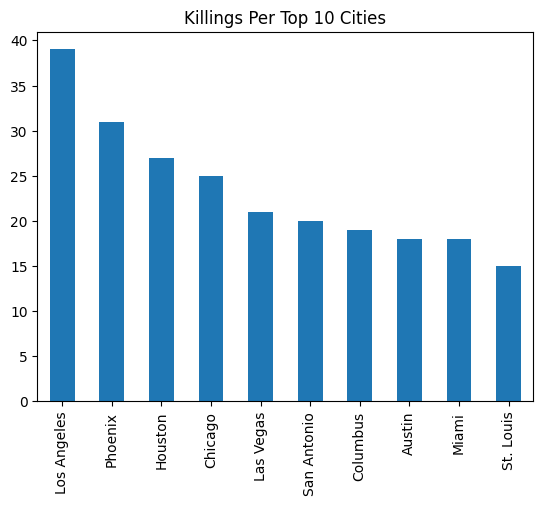

In [181]:
df_fatalities['city'].value_counts().head(10).plot.bar(title='Killings Per Top 10 Cities')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [142]:
top_10_list = df_fatalities[['city', 'race']]['city'].value_counts().head(10).to_frame()
top_10_list_index = top_10_list.index
races = df_fatalities['race'].value_counts().index

In [148]:
H = []
W = []
B = []
A = []
N = []
O = []
for i in top_10_list_index:
  df_fatalities4 = df_fatalities[df_fatalities['city'] == i ]
  for n in races:
    race = df_fatalities4[df_fatalities4['race'] == n]['race'].value_counts()
    if n == 'H':
      try:
        H.append(list(race.values)[0])
      except IndexError:
        H.append(0)
    elif n == 'W':
      try:
        W.append(list(race.values)[0])
      except IndexError:
        W.append(0)
    elif n == 'B':
      try:
        B.append(list(race.values)[0])
      except IndexError:
        B.append(0)
    elif n == 'A':
      try:
        A.append(list(race.values)[0])
      except IndexError:
        A.append(0)
    elif n == 'N':
      try:
        N.append(list(race.values)[0])
      except IndexError:
        N.append(0)
    elif n == 'O':
      try:
        O.append(list(race.values)[0])
      except IndexError:
        O.append(0)

top_10_list['Hispanic'] = H
top_10_list['White'] = W
top_10_list['Black'] = B
top_10_list['Asian'] = A
top_10_list['Native American'] = N
top_10_list['Other'] = O
top_10_list_to_plot = top_10_list.drop(columns='city')
top_10_list_to_plot


,Hispanic,White,Black,Asian,Native American,Other
Los Angeles,19,6,10,1,0,0
Phoenix,11,12,2,0,3,0
Houston,6,3,15,1,1,0
Chicago,1,2,21,0,0,0
Las Vegas,5,9,3,0,0,0
San Antonio,12,3,3,0,0,0
Columbus,0,6,11,0,0,1
Austin,2,13,3,0,0,0
Miami,6,3,8,0,0,0
St. Louis,0,3,11,0,0,0


<Axes: title={'center': 'Rate of Death by Race Per Top 10 Cities'}>

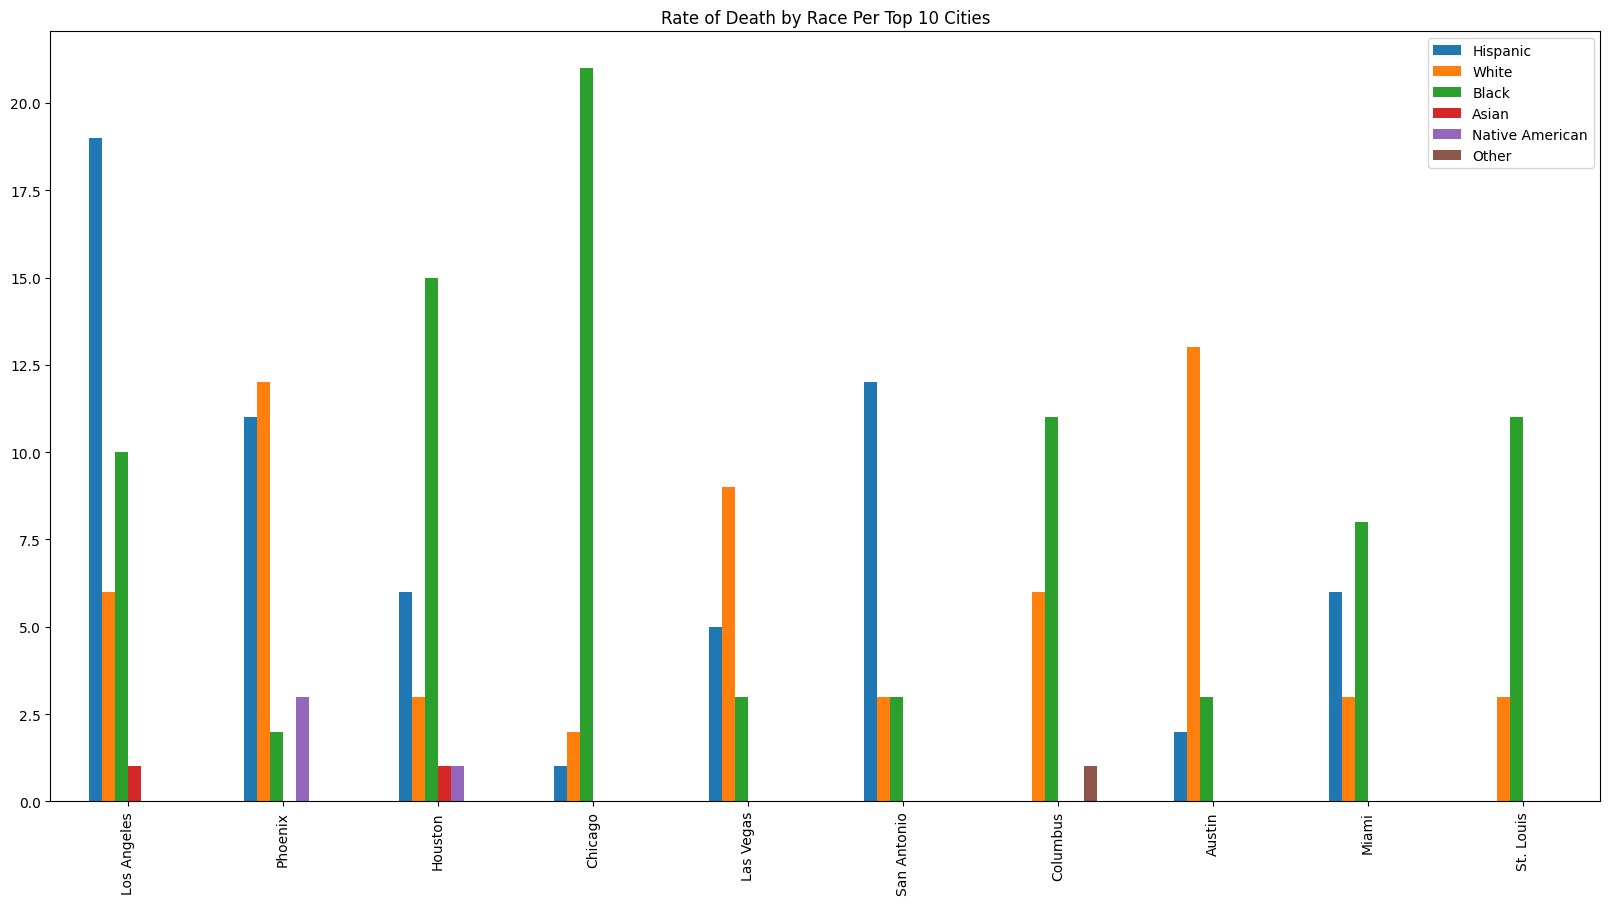

In [182]:
top_10_list_to_plot.plot.bar(figsize=(20, 10), title = 'Rate of Death by Race Per Top 10 Cities')

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [183]:
fig = px.choropleth( locations=df_fatalities.state.unique(), locationmode="USA-states", color=df_fatalities.state.value_counts(), hover_name=df_fatalities.state.unique(), color_continuous_scale="matter", scope="usa", title='Killings Per US States')
fig.show()

<Axes: title={'center': 'Poverty Rate Per State'}, xlabel='Geographic Area'>

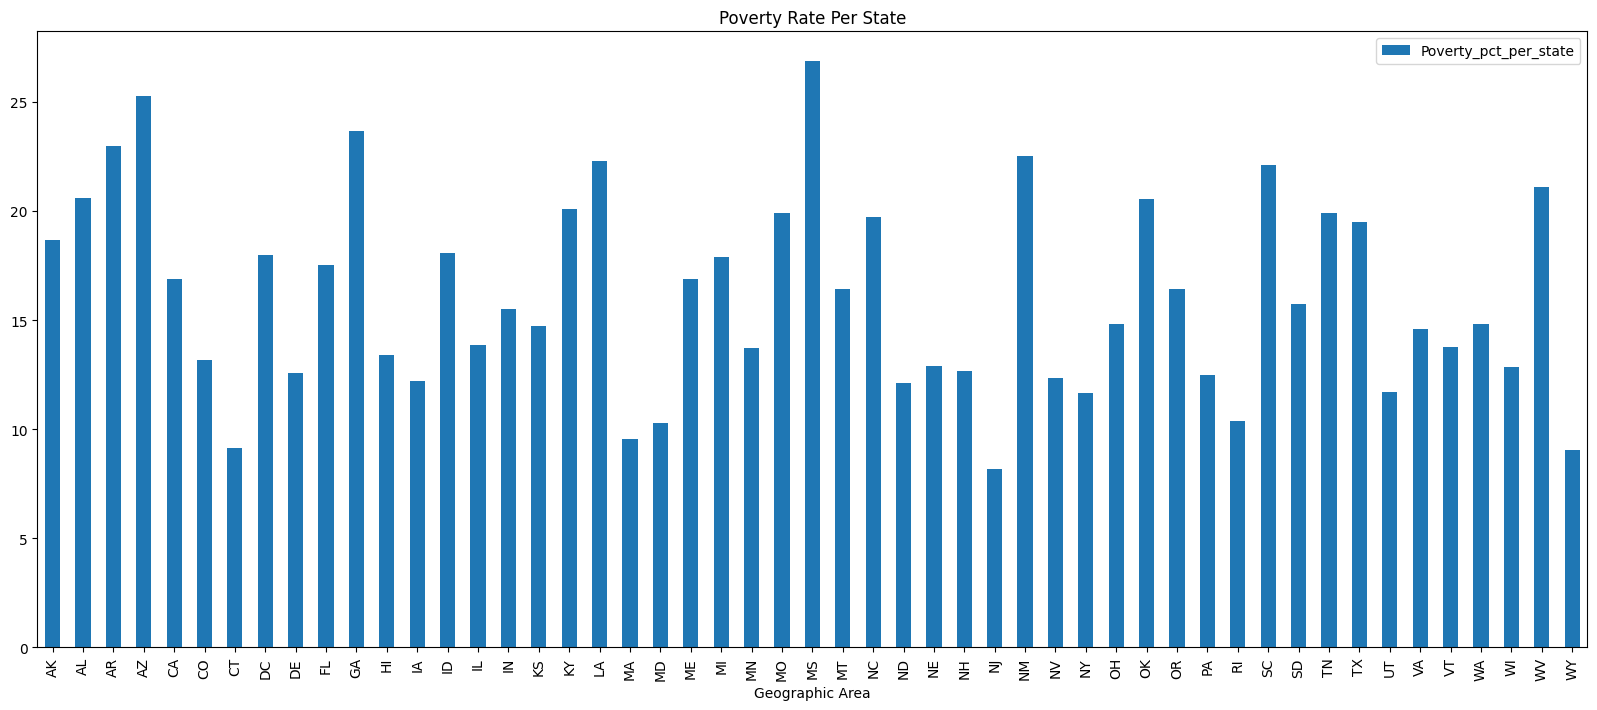

In [184]:
pct_per_state.plot.bar(figsize=(20, 8), title='Poverty Rate Per State')

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
# for i in df_fatalities['date']:
#   i = datetime.strptime(i, '%d/%m/%y')
#   print(i.year)
df_fatalities['date'] = [datetime.strptime(i, '%d/%m/%y') for i in df_fatalities['date']]

In [ ]:
df_fatalities['Years_of_death'] = [i.year for i in df_fatalities['date']]
df_fatalities

<Axes: title={'center': 'Killings Over The Years'}, xlabel='Years of killings', ylabel='Numbers of killings'>

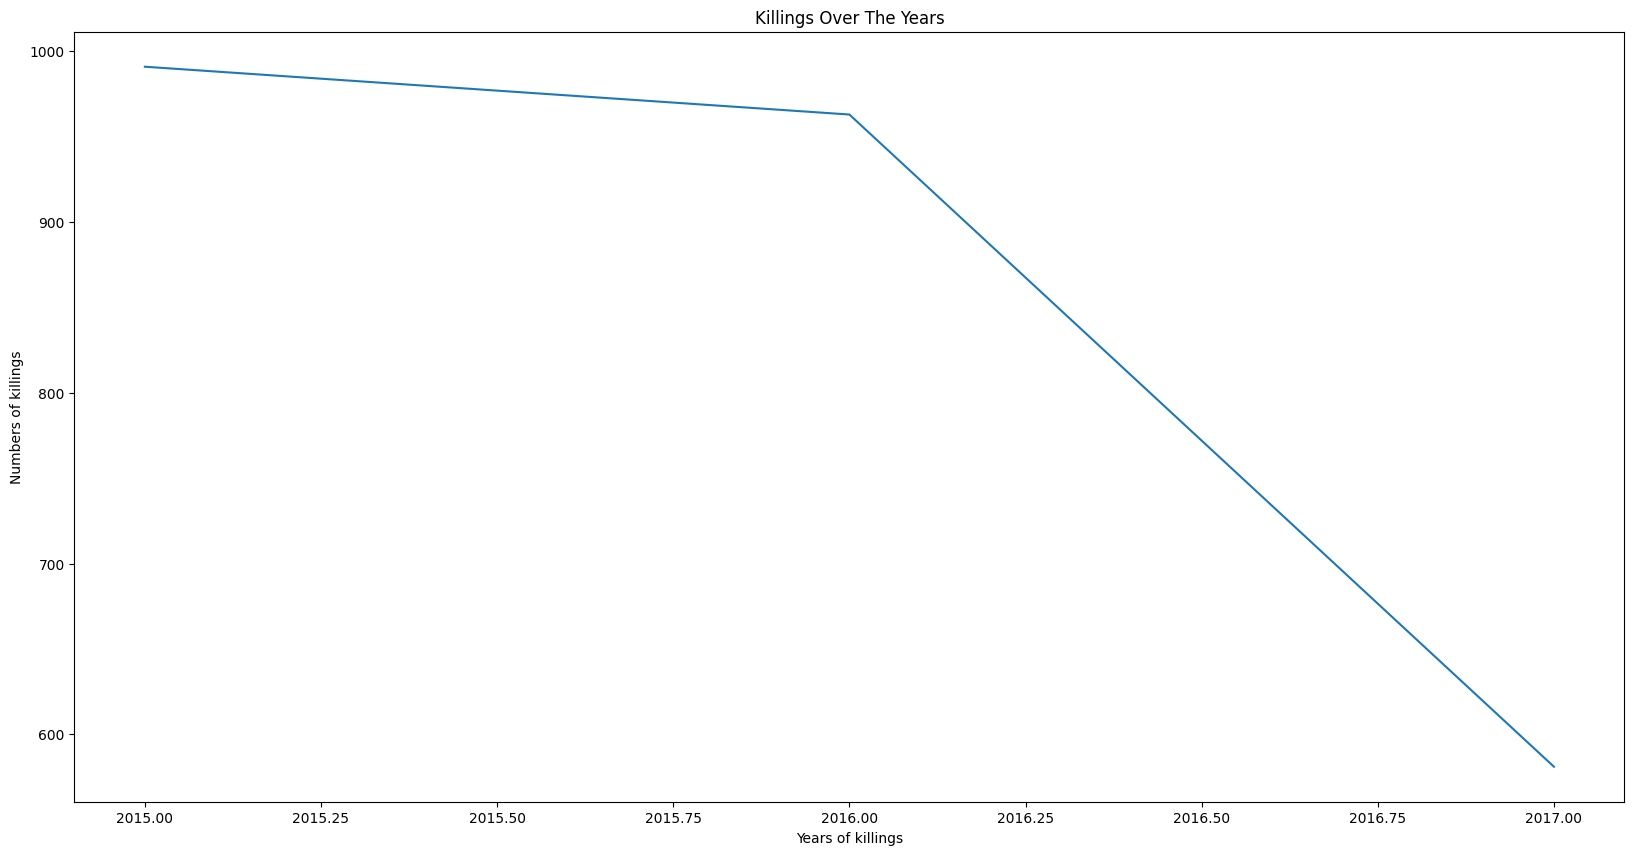

In [185]:
df_fatalities['Years_of_death'].value_counts().plot(figsize=(20, 10), xlabel = 'Years of killings', ylabel = 'Numbers of killings', title='Killings Over The Years')

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).